<a href="https://colab.research.google.com/github/Geekomaniac1009/MNIST-digit-classification/blob/main/knn_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic imports
import numpy as np
from tensorflow.keras.datasets import mnist

# For evaluation
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1] and flatten 28x28 images to 784-dim vectors
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Euclidean distance between test point and all training points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# Cosine distance between test point and all training points
def cosine_distance(a, b):
    a_norms = np.linalg.norm(a, axis=1)
    b_norm = np.linalg.norm(b)
    dot = np.dot(a, b)
    return 1 - (dot / (a_norms * b_norm + 1e-8))

In [ ]:
class KNNClassifier:
    def __init__(self, k=3, distance='euclidean'):
        self.k = k
        self.distance = distance
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _distance(self, x):
        if self.distance == 'euclidean':
            return euclidean_distance(self.X_train, x)
        elif self.distance == 'cosine':
            return cosine_distance(self.X_train, x)
        else:
            raise ValueError("Unknown distance metric")

    def predict_one(self, x):
        distances = self._distance(x)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        values, counts = np.unique(k_nearest_labels, return_counts=True)
        return values[np.argmax(counts)]

    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])


--- Evaluating with distance: euclidean ---
Accuracy (k=3, euclidean): 97.05%


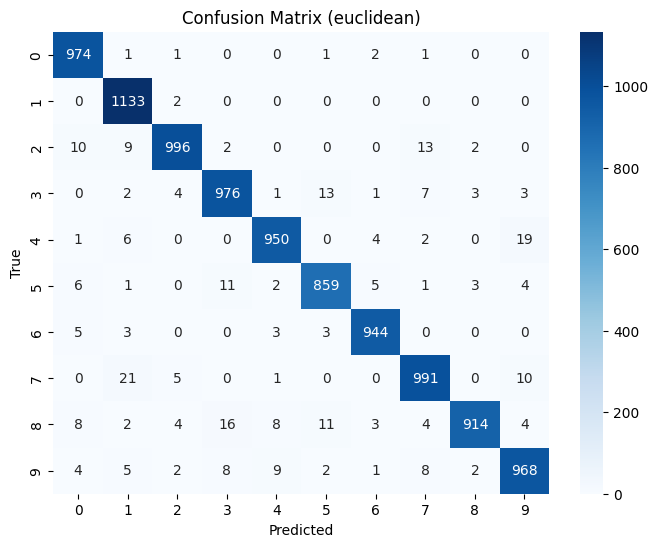

Classification Report (euclidean):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


--- Evaluating with distance: cosine ---
Accuracy (k=3, cosine): 97.33%


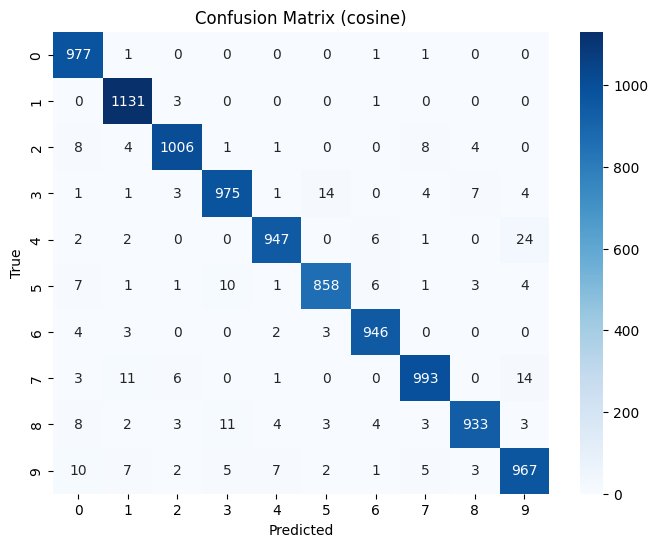

Classification Report (cosine):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
# === Evaluate KNN with full dataset for k=3 and both distances ===

for distance_metric in ['euclidean', 'cosine']:
    print(f"\n--- Evaluating with distance: {distance_metric} ---")

    knn = KNNClassifier(k=3, distance=distance_metric)
    knn.fit(x_train, y_train)

    # WARNING: This will take time (can be 15–30 minutes)
    y_pred = knn.predict(x_test)

    # Accuracy
    accuracy = np.mean(y_pred == y_test)
    print(f"Accuracy (k=3, {distance_metric}): {accuracy * 100:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix ({distance_metric})")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Classification Report
    print(f"Classification Report ({distance_metric}):")
    print(classification_report(y_test, y_pred))

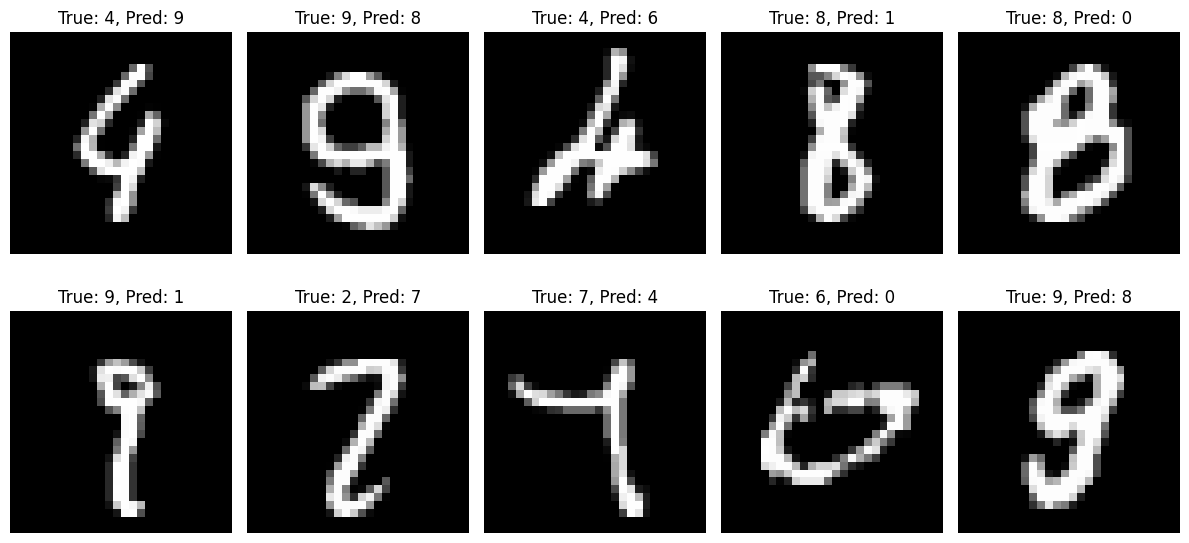

In [ ]:
# Visualize a few incorrect predictions to understand model errors
incorrect_indices = np.where(y_pred != y_test)[0]
plt.figure(figsize=(12, 6))
for i, idx in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Test different k values and distance metrics on smaller subset
def evaluate_knn_subset(k_values, distance_metrics, train_size=5000, test_size=1000):
    results = []

    x_train_small = x_train[:train_size]
    y_train_small = y_train[:train_size]
    x_test_small = x_test[:test_size]
    y_test_small = y_test[:test_size]

    for dist in distance_metrics:
        for k in k_values:
            knn = KNNClassifier(k=k, distance=dist)
            knn.fit(x_train_small, y_train_small)
            y_pred = knn.predict(x_test_small)
            acc = np.mean(y_pred == y_test_small)
            results.append((k, dist, acc))
            print(f"k={k}, distance={dist}, accuracy={acc:.4f}")

    return results

k=1, distance=euclidean, accuracy=0.9020
k=3, distance=euclidean, accuracy=0.9090
k=5, distance=euclidean, accuracy=0.9100
k=7, distance=euclidean, accuracy=0.9070
k=1, distance=cosine, accuracy=0.9170
k=3, distance=cosine, accuracy=0.9310
k=5, distance=cosine, accuracy=0.9300
k=7, distance=cosine, accuracy=0.9300


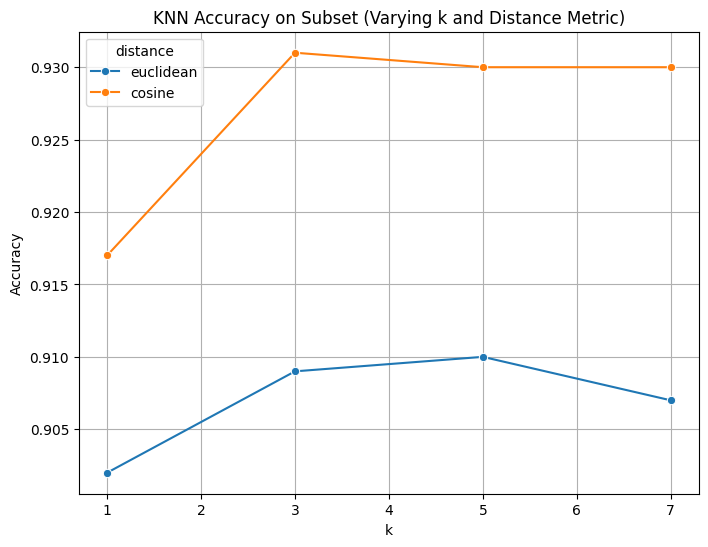

In [ ]:
# Define configs to test
k_vals = [1, 3, 5, 7]
distances = ['euclidean', 'cosine']

# Run evaluation
results = evaluate_knn_subset(k_vals, distances)

# Plot results
df_results = pd.DataFrame(results, columns=["k", "distance", "accuracy"])
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_results, x="k", y="accuracy", hue="distance", marker="o")
plt.title("KNN Accuracy on Subset (Varying k and Distance Metric)")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()